<a href="https://colab.research.google.com/github/piyu18/Pytorch-deep-learning/blob/main/PyTorch_DeepLearning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'1.12.1+cu113'

In [2]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.

In [8]:
# Create weight and bias
weight = 0.3
bias = 0.9

# Create range values
start = 0
end = 1
step = 0.01

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias 
X[:10], y[:10]



(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]), tensor([[0.9000],
         [0.9030],
         [0.9060],
         [0.9090],
         [0.9120],
         [0.9150],
         [0.9180],
         [0.9210],
         [0.9240],
         [0.9270]]))

In [9]:
X.shape, y.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [11]:
def plt_predictions(train_data=X_train,
                    train_label=y_train,
                    test_data=X_test,
                    test_label=y_test,
                    predictions=None):
  '''
  Plt training_data, test data and compare predictions
  '''
  plt.figure(figsize=(8,6))
  # Plot training data in blue
  plt.scatter(train_data, train_label, c='b', s=6, label='Train data')

  # Plot test data in green
  plt.scatter(test_data, test_label, c='g', s=6, label='Test data')

  # If prediction is there
  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=6, label='Predictions')
  
  plt.legend(prop={"size": 16})

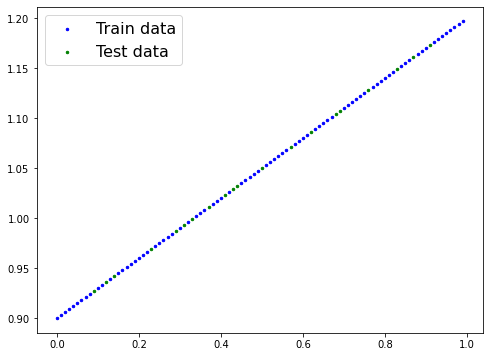

In [12]:
plt_predictions(X_train, y_train, X_test, y_test)

In [13]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1, 
                                      out_features=1)
    
    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always need but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [14]:
# Check model device
next(model_1.parameters()).device

device(type='cpu')

In [15]:
# Set model to GPU if it's availalble, otherwise it'll default to CPU
model_1.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_1.parameters()).device

device(type='cuda', index=0)

In [16]:
# Create loss function
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), # optimize newly created model's parameters
                            lr=0.01)

In [17]:
torch.manual_seed(42)

epochs = 500

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  y_pred = model_1(X_train)

  # Calculaute loss
  loss = loss_fn(y_pred, y_train)

  # Zero grad optimizer
  optimizer.zero_grad()

  # Loss backward
  loss.backward()

  # Step the optimizer
  optimizer.step()

  ### Testing
  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test)

     # Calculate the loss
    test_loss = loss_fn(test_pred, y_test)
  if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")




Epoch: 0 | Train loss: 0.1746305674314499 | Test loss: 0.150644913315773
Epoch: 100 | Train loss: 0.05158081650733948 | Test loss: 0.04406501352787018
Epoch: 200 | Train loss: 0.001917152083478868 | Test loss: 0.010539359413087368
Epoch: 300 | Train loss: 0.001917152083478868 | Test loss: 0.010539359413087368
Epoch: 400 | Train loss: 0.001917152083478868 | Test loss: 0.010539359413087368


In [18]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html 
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.3033]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.9003], device='cuda:0'))])

And the original values for weights and bias are:
weights: 0.3, bias: 0.9


In [19]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[1.0125],
        [1.0883],
        [1.1520],
        [0.9427],
        [1.0307],
        [0.9276],
        [1.0337],
        [0.9943],
        [1.1096],
        [1.0732],
        [1.0004],
        [1.1642],
        [0.9367],
        [1.1763],
        [1.0246],
        [0.9700],
        [1.1308],
        [0.9882],
        [1.0519],
        [1.1065]], device='cuda:0')

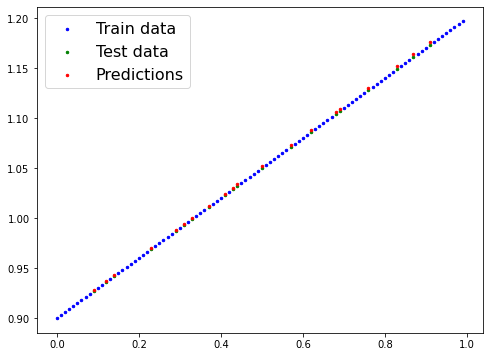

In [21]:
plt_predictions(predictions=y_preds.cpu())

In [22]:
from pathlib import Path

# Create directory
MODEL_PATH = Path('MODELS')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create modelsave path
MODEL_NAME = 'model1'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state_dict
torch.save(obj = model_1.state_dict(),
           f = MODEL_SAVE_PATH)

In [23]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict 
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cuda:0


In [24]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')